<a href="https://colab.research.google.com/github/GibrannRafi/FinalTask-Rakamin-Datascientist-ID-X-Partners/blob/main/Rakamin_Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NEEDED LIBRARY

In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score # Import roc_auc_score here
from imblearn.over_sampling import SMOTE

STEP OF DATA UNDERSTANDING

In [ ]:
df = pd.read_csv("loan_data_2007_2014.csv", low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(466285, 75)

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

inq_last_12m           466285
total_cu_tl            466285
open_acc_6m            466285
open_il_6m             466285
open_il_12m            466285
                        ...  
home_ownership              0
issue_d                     0
verification_status         0
loan_status                 0
Unnamed: 0                  0
Length: 75, dtype: int64


CEK MISSING VALUE

In [ ]:
df.isna()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
466281,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
466282,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
466283,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True


STEP OF FEATURE ENGINERING

In [ ]:
df['LTI'] = df['loan_amnt'] / (df['annual_inc'] + 1e-6)
df[['loan_amnt', 'annual_inc', 'LTI']].head(10)


,loan_amnt,annual_inc,LTI
0,5000,24000.0,0.208333
1,2500,30000.0,0.083333
2,2400,12252.0,0.195886
3,10000,49200.0,0.203252
4,3000,80000.0,0.037500
5,5000,36000.0,0.138889
6,7000,47004.0,0.148923
7,3000,48000.0,0.062500
8,5600,40000.0,0.140000
9,5375,15000.0,0.358333


In [ ]:
df.groupby('loan_status')['LTI'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42475.0,0.244162,0.115119,0.005208,0.153176,0.240000,0.333333,0.819672
Current,224226.0,0.228015,0.111095,0.001600,0.140000,0.218182,0.308751,0.821429
Default,832.0,0.255542,0.108865,0.017857,0.169802,0.250000,0.333333,0.649375
Does not meet the credit policy. Status:Charged Off,761.0,0.171928,0.119925,0.004611,0.089286,0.145455,0.229167,1.120000
Does not meet the credit policy. Status:Fully Paid,1984.0,0.152500,0.104375,0.003049,0.078949,0.133333,0.200000,1.337500
Fully Paid,184739.0,0.200590,0.106608,0.000789,0.118086,0.185714,0.269231,0.830000
In Grace Period,3146.0,0.243136,0.109350,0.009934,0.157083,0.238095,0.329963,0.513889
Late (16-30 days),1218.0,0.239155,0.110080,0.018116,0.153212,0.237351,0.320385,0.500000
Late (31-120 days),6900.0,0.247942,0.109124,0.011200,0.161290,0.245474,0.333333,0.552923


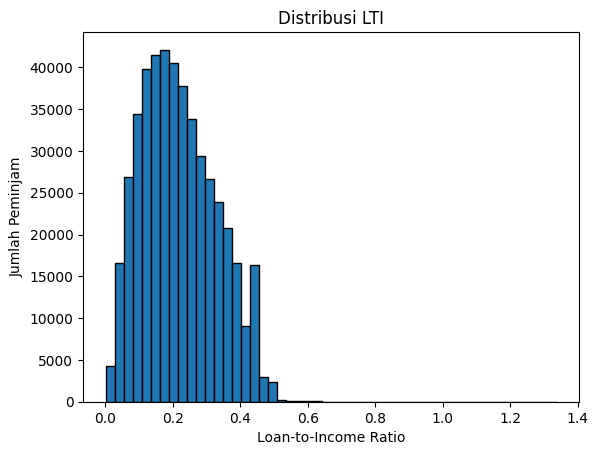

In [ ]:
plt.hist(df['LTI'], bins=50, edgecolor='black')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Jumlah Peminjam')
plt.title('Distribusi LTI')
plt.show()

STEP EXPLORATORY DATA ANALYIS

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


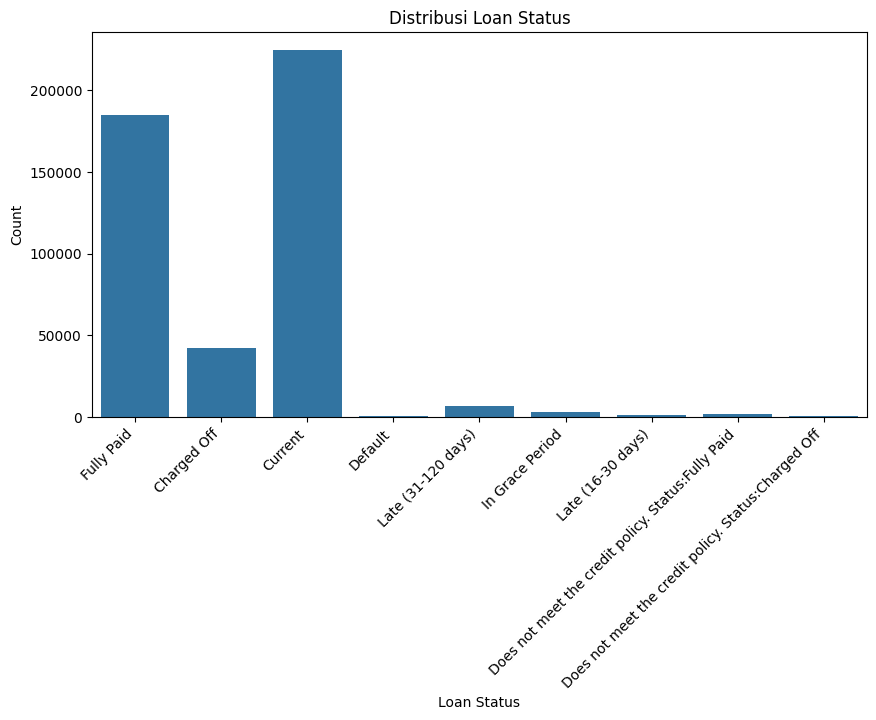

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["loan_status"])
plt.xticks(rotation=45, ha="right")
plt.title("Distribusi Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


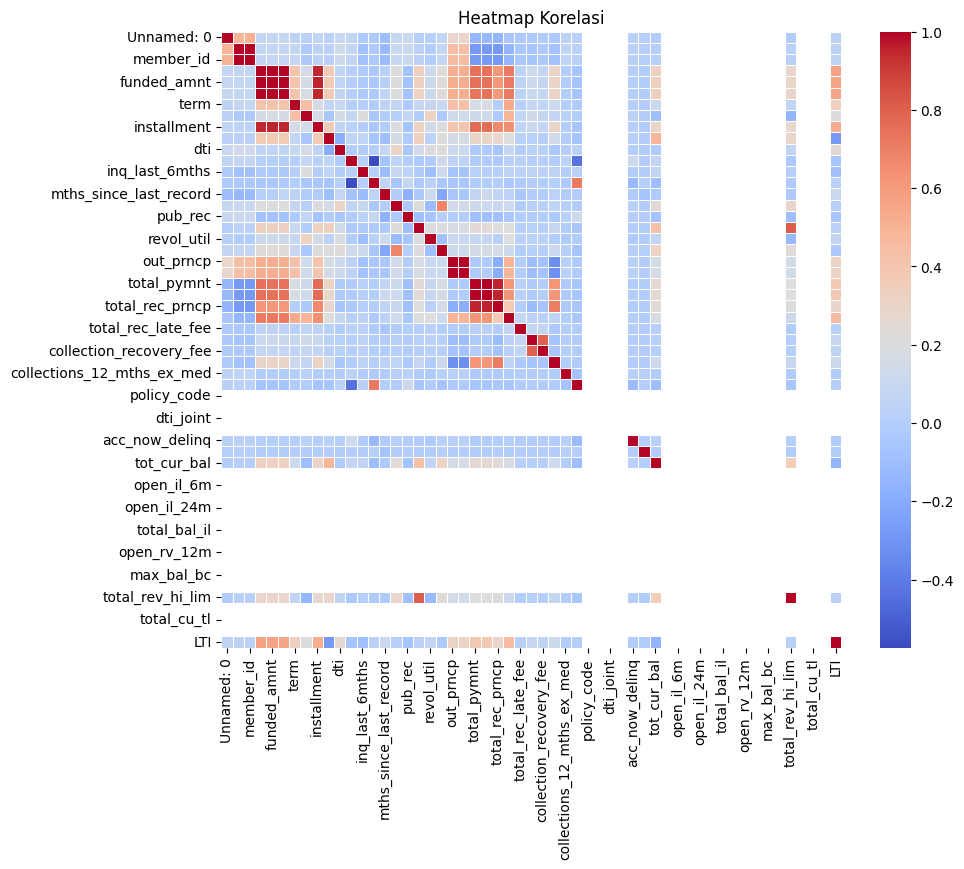

In [ ]:
df['term'] = df['term'].str.extract('(\d+)').astype(float)

# Memilih hanya kolom numerik untuk heatmap
df_numeric = df.select_dtypes(include=['number'])

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
corr = df_numeric.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

Korelasi tinggi ditemukan antara beberapa fitur keuangan seperti funded_amnt, loan_amnt, dan installment.
Beberapa fitur tidak memiliki korelasi signifikan dengan lainnya, kemungkinan karena missing values atau skala yang berbeda.

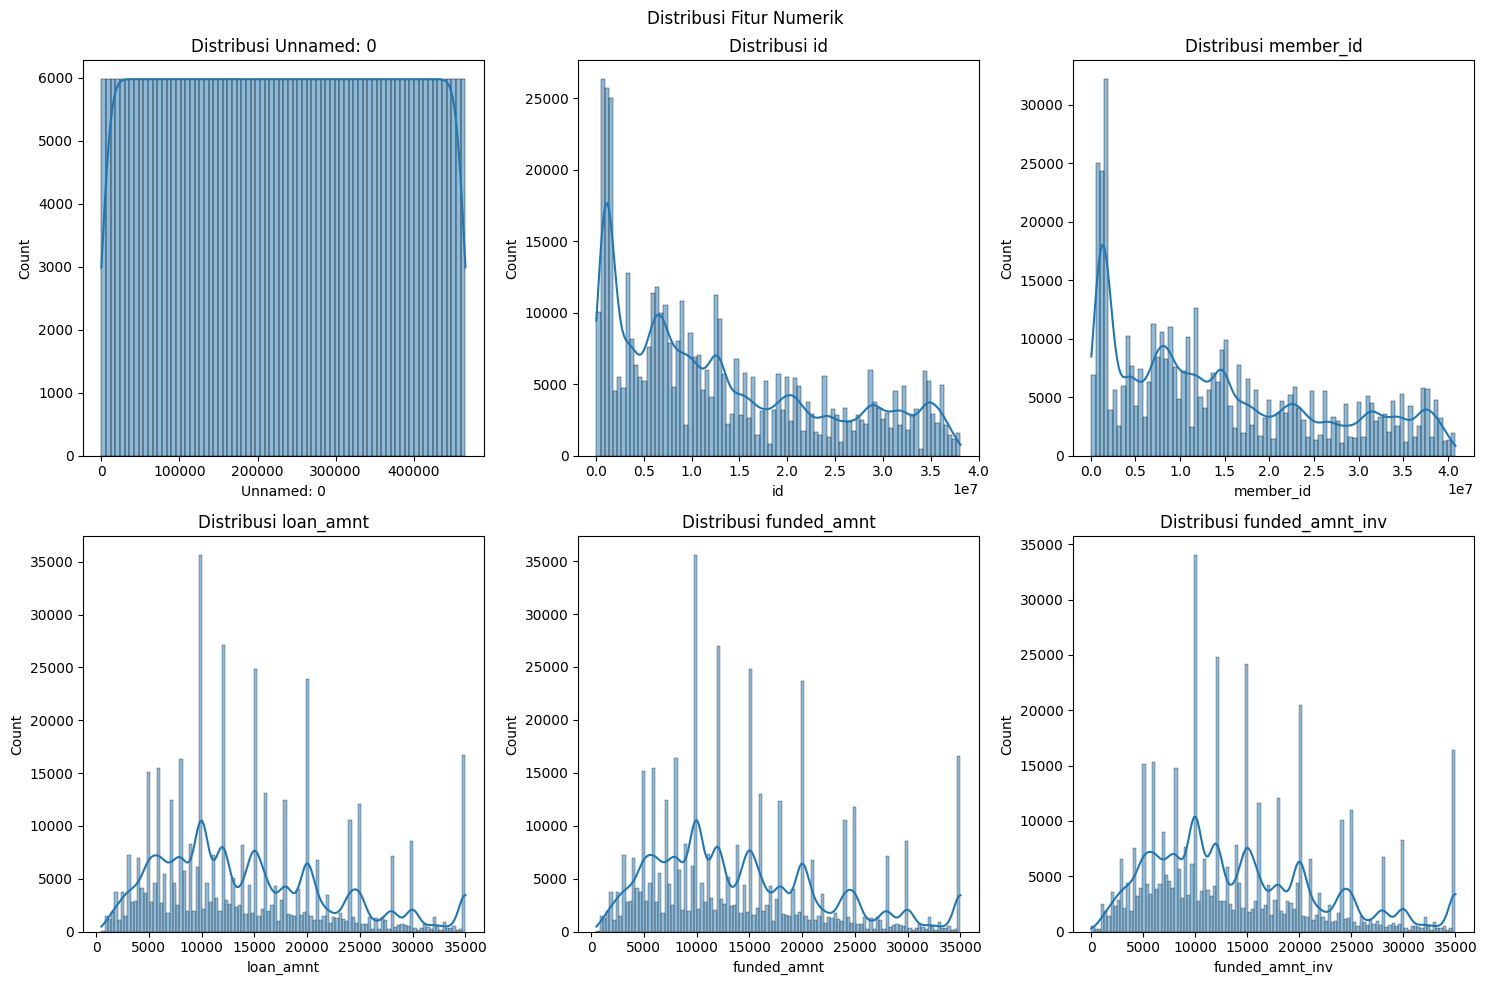

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Fitur Numerik")

for i, col in enumerate(num_cols[:6]):  # Pilih 6 fitur pertama untuk ditampilkan
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

- Fitur yang bisa dihapus: Unnamed: 0, id, member_id karena tidak memiliki nilai prediktif.
- Fitur loan_amnt, funded_amnt, funded_amnt_inv bisa distandarisasi atau di-log transform jika diperlukan untuk model yang lebih stabil.
- Perlu cek outlier, terutama untuk nilai pinjaman tinggi, agar model tidak bias.

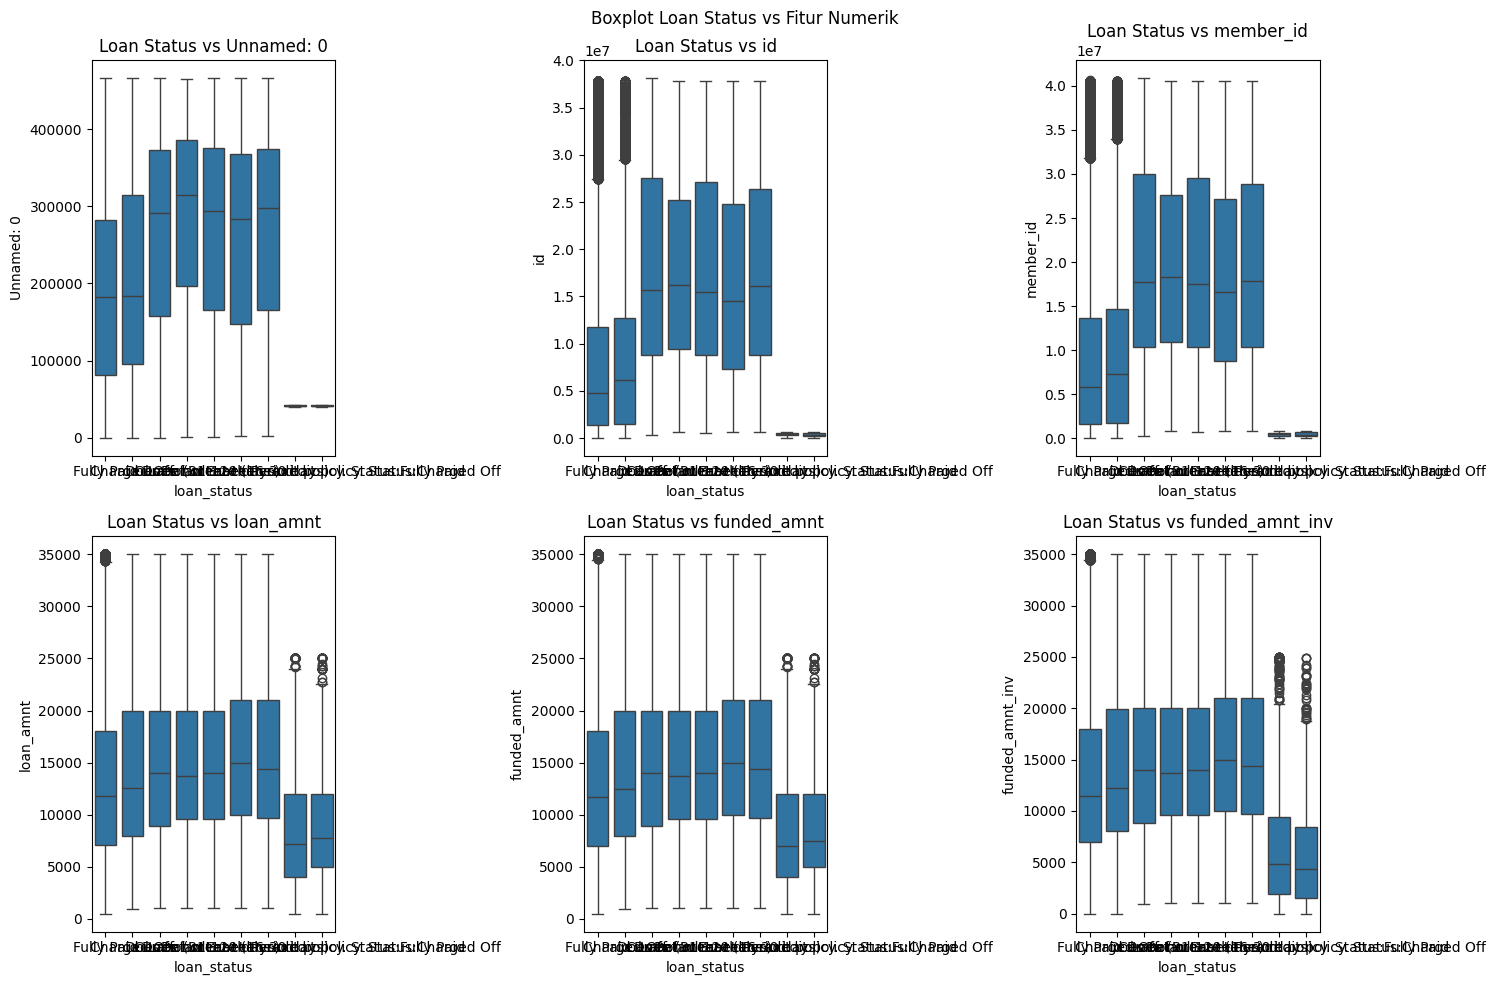

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Boxplot Loan Status vs Fitur Numerik")

for i, col in enumerate(num_cols[:6]):  # Pilih 6 fitur pertama untuk ditampilkan
    sns.boxplot(x='loan_status', y=df[col], data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Loan Status vs {col}")

plt.tight_layout()
plt.show()


- Hapus Unnamed: 0, id, dan member_id karena tidak relevan.
- Fokus analisis pada loan_amnt, funded_amnt, funded_amnt_inv karena ada pola yang bisa dieksplorasi lebih lanjut.
- Cek outlier, terutama di nilai pinjaman besar. Bisa dilakukan capping atau log transform agar tidak mendominasi model.

BERDASARKAN EDA DIATAS MAKA KITA PERLU MENGHAPUS UNAMED, ID DAN MEMBER ID


In [ ]:
df.drop(columns=["Unnamed: 0", "id", "member_id"], inplace=True)

In [ ]:

df = df.dropna(axis=1, how='all')


numerical_features = df.select_dtypes(include=["number"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns


num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")


df.loc[:, numerical_features] = num_imputer.fit_transform(df[numerical_features])
df.loc[:, categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [ ]:
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

df.loc[:, numerical_features] = num_imputer.fit_transform(df[numerical_features])
df.loc[:, categorical_features] = cat_imputer.fit_transform(df[categorical_features])



In [ ]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4️⃣ **SMOTE Oversampling (Hanya untuk Train Set)**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5️⃣ Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Inisialisasi Model dengan Handling Imbalanced Data
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=500),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=len(y_train) / (2 * y_train.value_counts())  # Handling imbalance
    )
}

# 7️⃣ **Training & Evaluasi Model**
for name, model in models.items():
    model.fit(X_train_scaled if "Logistic" in name else X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled if "Logistic" in name else X_test)

    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled if "Logistic" in name else X_test), multi_class='ovr'))

# 8️⃣ **Hyperparameter Tuning XGBoost**
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [len(y_train) / (2 * y_train.value_counts())]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("\n🔹 Best XGBoost Params:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.8397
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8469
           1       0.98      0.72      0.83     44894
           2       0.01      0.30      0.02       173
           3       0.44      0.95      0.60       148
           4       0.25      0.96      0.40       377
           5       0.99      0.97      0.98     36906
           6       0.03      0.25      0.05       653
           7       0.02      0.24      0.03       237
           8       0.81      0.73      0.77      1400

    accuracy                           0.84     93257
   macro avg       0.50      0.68      0.52     93257
weighted avg       0.97      0.84      0.89     93257

ROC-AUC Score: 0.9402067670184301


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:12:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9841
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8469
           1       0.98      1.00      0.99     44894
           2       0.94      0.79      0.86       173
           3       0.93      0.99      0.96       148
           4       0.98      1.00      0.99       377
           5       1.00      1.00      1.00     36906
           6       0.14      0.03      0.05       653
           7       0.15      0.03      0.06       237
           8       0.94      0.79      0.86      1400

    accuracy                           0.98     93257
   macro avg       0.79      0.73      0.75     93257
weighted avg       0.98      0.98      0.98     93257

ROC-AUC Score: 0.9824098233154474


NameError: name 'GridSearchCV' is not defined